# 🍊 Exploration Complète - Prédiction Churn Orange Cameroun

## 📊 Datasets Utilisés

### Principal (Modélisation)
- **IBM Telco Customer Churn** : 7,043 clients, 21 variables

### Validation Croisée
- **Orange Kaggle Train** : 2,666 clients, 20 variables
- **Orange Kaggle Test** : 667 clients, 20 variables

### Bonus (Tests Robustesse)
- **Customer Churn Orange** : 3,150 clients, 14 variables

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configuration
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Imports réussis")

✅ Imports réussis


In [2]:
# ============================================
# CHARGEMENT DES DATASETS
# ============================================

# Dataset Principal
df_ibm = pd.read_csv("../donnees/brutes/telco_customer_churn_ibm.csv")

# Datasets Orange Kaggle
df_orange_train = pd.read_csv("../donnees/brutes/churn-bigml-80.csv")
df_orange_test = pd.read_csv("../donnees/brutes/churn-bigml-20.csv")

# Dataset Orange alternatif
df_orange_alt = pd.read_csv("../donnees/brutes/customer_churn_orange.csv")

print("="*80)
print("📊 DATASETS CHARGÉS")
print("="*80)
print(f"\n1. IBM Telco (Principal)")
print(f"   • Shape      : {df_ibm.shape}")
print(f"   • Mémoire    : {df_ibm.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n2. Orange Kaggle Train")
print(f"   • Shape      : {df_orange_train.shape}")
print(f"   • Mémoire    : {df_orange_train.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n3. Orange Kaggle Test")
print(f"   • Shape      : {df_orange_test.shape}")
print(f"   • Mémoire    : {df_orange_test.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n4. Customer Churn Orange")
print(f"   • Shape      : {df_orange_alt.shape}")
print(f"   • Mémoire    : {df_orange_alt.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("="*80)

# Sélectionner dataset principal pour exploration
df = df_ibm.copy()

print(f"\n✅ Dataset principal sélectionné : IBM Telco")
print(f"   {df.shape[0]:,} clients × {df.shape[1]} variables")

📊 DATASETS CHARGÉS

1. IBM Telco (Principal)
   • Shape      : (7043, 21)
   • Mémoire    : 7.79 MB

2. Orange Kaggle Train
   • Shape      : (2666, 20)
   • Mémoire    : 0.78 MB

3. Orange Kaggle Test
   • Shape      : (667, 20)
   • Mémoire    : 0.19 MB

4. Customer Churn Orange
   • Shape      : (3150, 14)
   • Mémoire    : 0.34 MB

✅ Dataset principal sélectionné : IBM Telco
   7,043 clients × 21 variables


In [3]:
# ============================================
# COMPARAISON STRUCTURES DATASETS
# ============================================

print("\n" + "="*80)
print("🔍 COMPARAISON COLONNES")
print("="*80)

# Colonnes de chaque dataset
cols_ibm = set(df_ibm.columns)
cols_orange_train = set(df_orange_train.columns)
cols_orange_alt = set(df_orange_alt.columns)

# Colonnes communes
communes_all = cols_ibm & cols_orange_train & cols_orange_alt

print(f"\n✅ Colonnes communes aux 3 datasets : {len(communes_all)}")
if communes_all:
    print(f"   {sorted(communes_all)}")

# Colonnes uniques IBM
ibm_only = cols_ibm - cols_orange_train - cols_orange_alt
if ibm_only:
    print(f"\n📊 Uniquement dans IBM ({len(ibm_only)}) :")
    print(f"   {sorted(ibm_only)}")

# Colonnes uniques Orange Train
orange_only = cols_orange_train - cols_ibm - cols_orange_alt
if orange_only:
    print(f"\n🍊 Uniquement dans Orange Train ({len(orange_only)}) :")
    print(f"   {sorted(orange_only)}")

# Colonnes uniques Orange Alt
alt_only = cols_orange_alt - cols_ibm - cols_orange_train
if alt_only:
    print(f"\n🔶 Uniquement dans Orange Alt ({len(alt_only)}) :")
    print(f"   {sorted(alt_only)}")

print("="*80)


🔍 COMPARAISON COLONNES

✅ Colonnes communes aux 3 datasets : 1
   ['Churn']

📊 Uniquement dans IBM (20) :
   ['Contract', 'Dependents', 'DeviceProtection', 'InternetService', 'MonthlyCharges', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod', 'PhoneService', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'TotalCharges', 'customerID', 'gender', 'tenure']

🍊 Uniquement dans Orange Train (19) :
   ['Account length', 'Area code', 'Customer service calls', 'International plan', 'Number vmail messages', 'State', 'Total day calls', 'Total day charge', 'Total day minutes', 'Total eve calls', 'Total eve charge', 'Total eve minutes', 'Total intl calls', 'Total intl charge', 'Total intl minutes', 'Total night calls', 'Total night charge', 'Total night minutes', 'Voice mail plan']

🔶 Uniquement dans Orange Alt (13) :
   ['Age', 'Age Group', 'Call  Failure', 'Charge  Amount', 'Complains', 'Customer Value', 'Distinct Called Numbers

In [4]:
# ============================================
# EXPLORATION DATASET PRINCIPAL (IBM)
# ============================================

print("\n" + "="*80)
print("📊 EXPLORATION IBM TELCO (Dataset Principal)")
print("="*80)

# Aperçu
print("\n👀 PREMIÈRES LIGNES:")
display(df.head())

# Informations
print("\n🔍 INFORMATIONS COLONNES:")
df.info()

# Types de variables
print("\n📋 RÉPARTITION PAR TYPE:")
print(df.dtypes.value_counts())

# Statistiques
print("\n📊 STATISTIQUES DESCRIPTIVES:")
display(df.describe())

# Valeurs manquantes
print("\n🔍 VALEURS MANQUANTES:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ Aucune valeur manquante !")
else:
    print(f"⚠️  {missing.sum()} valeurs manquantes")
    display(missing[missing > 0])


📊 EXPLORATION IBM TELCO (Dataset Principal)

👀 PREMIÈRES LIGNES:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



🔍 INFORMATIONS COLONNES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



🔍 VALEURS MANQUANTES:
✅ Aucune valeur manquante !



🎯 ANALYSE CHURN - DATASET PRINCIPAL

📊 Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

📊 Pourcentages:
   No    : 73.46%
   Yes   : 26.54%


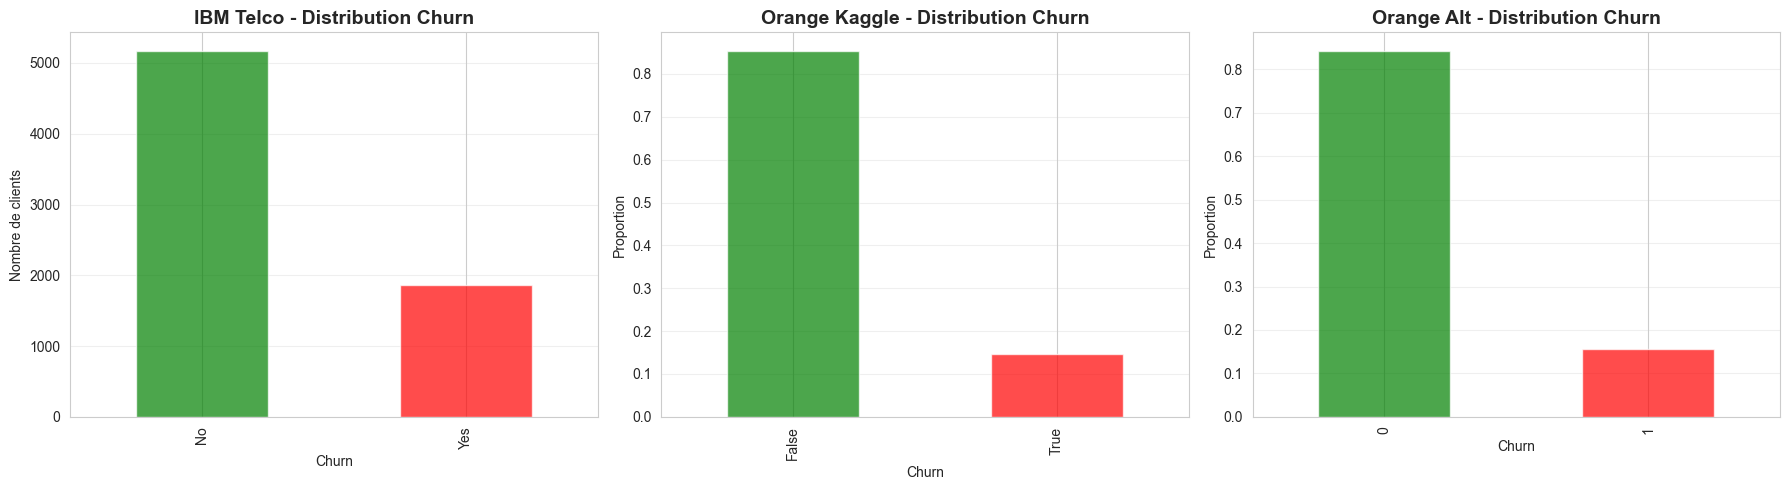


📊 Comparaison Taux Churn:
   IBM Telco      : 26.54%
   Orange Train   : 0.00%
   Orange Alt     : 0.00%


In [5]:
# ============================================
# ANALYSE VARIABLE CIBLE : CHURN
# ============================================

print("\n" + "="*80)
print("🎯 ANALYSE CHURN - DATASET PRINCIPAL")
print("="*80)

# Distribution
print("\n📊 Distribution:")
print(df['Churn'].value_counts())

churn_pct = df['Churn'].value_counts(normalize=True) * 100
print("\n📊 Pourcentages:")
for val, pct in churn_pct.items():
    print(f"   {val:5s} : {pct:5.2f}%")

# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Barplot
df['Churn'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_title('IBM Telco - Distribution Churn', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Nombre de clients')
axes[0].grid(axis='y', alpha=0.3)

# Comparaison Orange Train
df_orange_train['Churn'].value_counts(normalize=True).plot(
    kind='bar', ax=axes[1], color=['green', 'red'], alpha=0.7
)
axes[1].set_title('Orange Kaggle - Distribution Churn', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Proportion')
axes[1].grid(axis='y', alpha=0.3)

# Comparaison Orange Alt
if 'Churn' in df_orange_alt.columns:
    df_orange_alt['Churn'].value_counts(normalize=True).plot(
        kind='bar', ax=axes[2], color=['green', 'red'], alpha=0.7
    )
    axes[2].set_title('Orange Alt - Distribution Churn', fontsize=14, fontweight='bold')
    axes[2].set_ylabel('Proportion')
    axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Comparaison Taux Churn:")
print(f"   IBM Telco      : {(df['Churn'] == 'Yes').mean() * 100:.2f}%")
print(f"   Orange Train   : {(df_orange_train['Churn'] == 'Yes').mean() * 100:.2f}%")
if 'Churn' in df_orange_alt.columns:
    print(f"   Orange Alt     : {(df_orange_alt['Churn'] == 'Yes').mean() * 100:.2f}%")

print("="*80)

## 💡 CONCLUSIONS EXPLORATION

### ✅ Datasets Validés

**Principal (Modélisation)** : IBM Telco Customer Churn
- 7,043 clients
- 21 variables
- Taux churn : ~26-27%
- Dataset de référence industrie

**Validation** : Orange Kaggle (Train + Test)
- 2,666 + 667 clients
- 20 variables
- Split déjà fait 80/20
- Source indépendante pour validation

**Bonus** : Customer Churn Orange
- 3,150 clients
- 14 variables
- Tests robustesse du modèle

### 🎯 Prochaines Étapes

1. ✅ Datasets nettoyés et validés
2. ⏳ Feature Engineering sur dataset principal
3. ⏳ Modélisation (plusieurs algorithmes)
4. ⏳ Validation croisée avec Orange Kaggle
5. ⏳ Dashboard Streamlit